 <h1 style="text-align:center;">Exploratory Data Analysis of Microservice Tracing Data</h1>




Microservices are an architectural approach to developing software applications as a collection of small, independent services that communicate with each other over a network.

Focus:

     To do EDA on Microservice Tracing Data

In [2]:
## import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


In [5]:
## import dataset
df=pd.read_excel("/traces_dataset.xlsx")
df

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,2023-11-23 04:42:32.707,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,2023-11-23 04:42:32.707,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,2023-11-23 04:42:33.930,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,2023-11-23 04:42:36.928,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,2023-11-23 04:42:39.924,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000
...,...,...,...,...,...,...,...
183610,2023-11-23 03:44:52.018,cc3f285a2ef094d4ba7582b1d5d47882,ebf0df7adc41ca4d,53e18cd5258047f5,recommendationservice,/oteldemo.ProductCatalogService/ListProducts,1016311
183611,2023-11-23 03:44:54.128,be4a70fee4913f3cf56b1c64228bcdb5,0975afe20d7368d2,7a1c6f8d9bff070f,currencyservice,CurrencyService/Convert,34953
183612,2023-11-23 03:44:54.130,be4a70fee4913f3cf56b1c64228bcdb5,96139b9d0d16639a,8f0b4f79ec0d0005,currencyservice,CurrencyService/Convert,25660
183613,2023-11-23 03:44:54.133,be4a70fee4913f3cf56b1c64228bcdb5,b1321d3db08e86d3,73e8e9281d421a7d,quoteservice,calculate-quote,5401


In [ ]:
## dimension of our dataset
df.shape

(183615, 7)

There are 183615 rows and 7 columns in our dataset

In [ ]:
##information regarding our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Timestamp     183615 non-null  datetime64[ns]
 1   traceID       183615 non-null  object        
 2   spanID        183615 non-null  object        
 3   parentSpanID  141834 non-null  object        
 4   serviceName   183615 non-null  object        
 5   Name          183615 non-null  object        
 6   durationNano  183615 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 9.8+ MB


1)From above we can see that there are 4 object columns,1 datetime column and 1 integer column.

2)There are null values only in one column , parentSpanID .

In [ ]:
## first 5 rows
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,2023-11-23 04:42:32.707,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,2023-11-23 04:42:32.707,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,2023-11-23 04:42:33.930,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,2023-11-23 04:42:36.928,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,2023-11-23 04:42:39.924,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


In [ ]:
##last 5 rows
df.tail()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
183610,2023-11-23 03:44:52.018,cc3f285a2ef094d4ba7582b1d5d47882,ebf0df7adc41ca4d,53e18cd5258047f5,recommendationservice,/oteldemo.ProductCatalogService/ListProducts,1016311
183611,2023-11-23 03:44:54.128,be4a70fee4913f3cf56b1c64228bcdb5,0975afe20d7368d2,7a1c6f8d9bff070f,currencyservice,CurrencyService/Convert,34953
183612,2023-11-23 03:44:54.130,be4a70fee4913f3cf56b1c64228bcdb5,96139b9d0d16639a,8f0b4f79ec0d0005,currencyservice,CurrencyService/Convert,25660
183613,2023-11-23 03:44:54.133,be4a70fee4913f3cf56b1c64228bcdb5,b1321d3db08e86d3,73e8e9281d421a7d,quoteservice,calculate-quote,5401
183614,2023-11-23 03:44:54.138,be4a70fee4913f3cf56b1c64228bcdb5,ae64d281880bfed7,2f7d3638d3ad3342,currencyservice,CurrencyService/Convert,30845


In [ ]:
## column names
df.columns

Index(['Timestamp', 'traceID', 'spanID', 'parentSpanID', 'serviceName', 'Name',
       'durationNano'],
      dtype='object')


- Timestamp : Time of occurrence of the event
- traceID: Unique ID of an execution path through the system
- spanID: Unique ID associated with execution of a logical unit
- parentSpanID: spanID of parent span that called a given span
- serviceName: Name of microservice associated with the span
- Name: Method/function/endpoint name associated with the span
- durationNano: Time taken in nanoseconds to execute the span




In [ ]:
##checking for null values
df.isna().sum()

Timestamp           0
traceID             0
spanID              0
parentSpanID    41781
serviceName         0
Name                0
durationNano        0
dtype: int64

Null values present only in parentSpanID column

In [ ]:
## filling nullvalues in parentSpanID  using 0
df['parentSpanID'].fillna(0, inplace=True)

Since null values are not good for modelling our machine learning model,I just replaced null values with 0.

In [ ]:
## again checking for null values
df.isna().sum()

Timestamp       0
traceID         0
spanID          0
parentSpanID    0
serviceName     0
Name            0
durationNano    0
dtype: int64

In [ ]:
##statistical summary of our dataset
df.describe()

,durationNano
count,1.836150e+05
mean,5.414918e+06
std,2.077879e+07
min,0.000000e+00
25%,3.357000e+05
50%,1.584906e+06
75%,6.832718e+06
max,4.999858e+09


In [ ]:
##exploring categorical features
df.describe(include=object)

,traceID,spanID,parentSpanID,serviceName,Name
count,183615,183615,183615,183615,183615
unique,41792,183615,107234,17,66
top,1f2fae8467906870310cea93db646b1b,0d87dcf5ea5aeaab,0,frontend,HTTP GET
freq,62,1,41781,65758,41311


Insights:

1)The count indicates the number of non-null values in each column.

2)The unique count shows the number of distinct values in each column.For example, traceID has 41,792 unique values, while serviceName has 17 unique values, and Name has 66 unique values.

3)The top row represents the most frequent value in each column.For example, the most frequent traceID is '1f2fae8467906870310cea93db646b1b', and the most frequent serviceName is 'frontend'.

4)The frequency or count of the top value shows how many times the top value occurs in the respective column.For example, '1f2fae8467906870310cea93db646b1b' occurs 62 times in the traceID column, indicating a relatively common traceID.



In [ ]:
##checking for duplicates in our dataset
duplicates=df.duplicated()
duplicates.sum()

0

There are no duplictes in our dataset.

***Exploring Columns ***


In [ ]:
##count the occurrences of unique values
df['traceID'].value_counts()

1f2fae8467906870310cea93db646b1b    62
baf28a33f67b3fdc32a23efc21ebe1ca    62
1a22bbee3f36988839bd3a3942702489    62
61e54cdbd7d9de6aa0208c2cc5953564    62
149a8568251d5fe3a3063325a295d449    62
                                    ..
f0e1817ed4f9b6a55cc562663cadce94     1
42c2ff9c6dbc49086f2b167aebe3763c     1
52249464b186bf19c41ae4ce8c59f374     1
7a9e56b233c638a999c571f02267e713     1
067f3d281447b5b3773e7d70ede6a0b5     1
Name: traceID, Length: 41792, dtype: int64

In [ ]:
##Returns the count of unique elements.
df['traceID'].nunique()

41792

Only 41792 unique values in traceID.

In [ ]:
##Returns an array or list of unique elements.
df['traceID'].unique()

array(['d8d992638d73274d0a6710a1f9d17f93',
       'fab7ab123d61c8d7d71062fc44ffb87e',
       '39a34f6b196aa69cdd5364bfc73b35b4', ...,
       '15243d75c8354995c1054a7a75a20367',
       '4d45a4d63d5ec0498c01d532d077ef21',
       'e48e1431249a8879f4441b3222a7c96d'], dtype=object)

**Distribution Of TraceId**

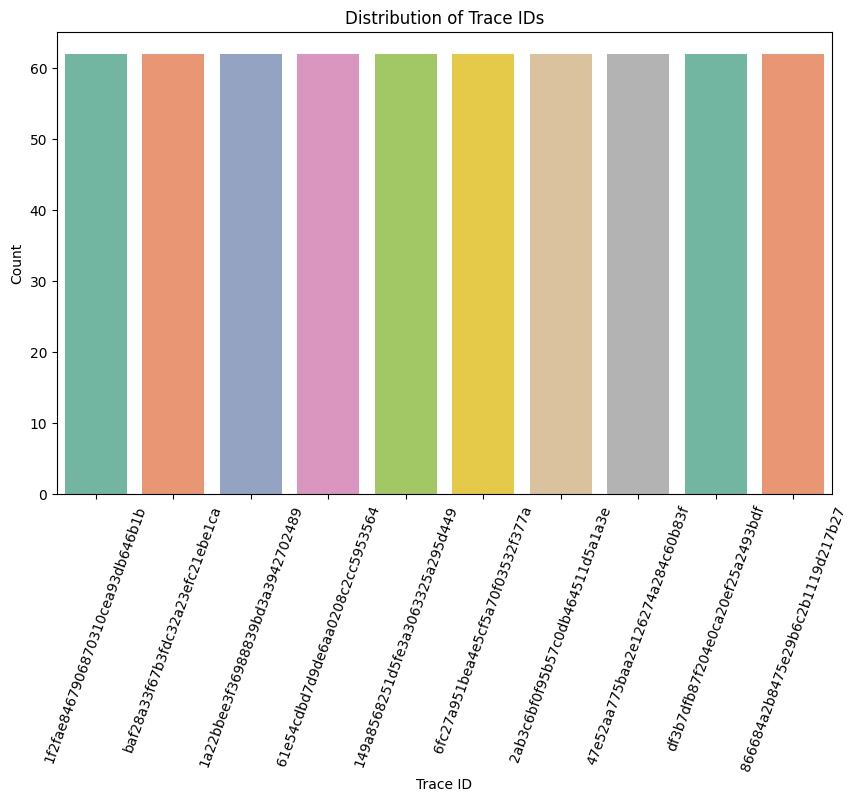

In [ ]:
## Visualising the distribution of first 10 traceid's

## mentioning the figure size
plt.figure(figsize=(10,6))
## taking unique values in traceid
trace_id_counts = df['traceID'].value_counts()
##taking top 10 values
top_10_trace_ids = trace_id_counts.head(10)
##used to set different colors for bars
color_palette = sns.color_palette("Set2")
##plotting data we use barplot from seaborn
sns.barplot(x=top_10_trace_ids.index, y=top_10_trace_ids.values,palette=color_palette)
## mentioning xlabel
plt.xlabel('Trace ID')
##mentioning ylabel
plt.ylabel('Count')
## proper alignment of xlabels
plt.xticks(rotation=70)
plt.title('Distribution of Trace IDs')
## to show the plot
plt.show()

**Insights:**


From the above ,we can see  top 10 most frequent traceid's ,almost all of them have equal frequency.

In [6]:
df['spanID'].value_counts()

0d87dcf5ea5aeaab    1
ed13885daefc12ba    1
cdcf63650f7f82c6    1
51b6a11a8d33f7ba    1
08ce7a85a111640d    1
                   ..
eab9b1d137205979    1
c8c5d5c5f1839549    1
24f249ed9461220e    1
ed7c8fa3c0227642    1
ae64d281880bfed7    1
Name: spanID, Length: 183615, dtype: int64

In [ ]:
df['spanID'].nunique()

183615

All values are unique

In [ ]:
df['spanID'].unique()

array(['0d87dcf5ea5aeaab', 'bd0a6f75f1a901b7', 'fe4acd4c8a763d24', ...,
       '96139b9d0d16639a', 'b1321d3db08e86d3', 'ae64d281880bfed7'],
      dtype=object)

In [7]:
df['parentSpanID'].value_counts()

d1783a9be93930b7    59
d7d27bf87b2ccf8b    19
db11eaa9e76ff8aa    17
5d746ecc99184252    11
cd0cbbb33a062979    11
                    ..
5af930f24ae858d9     1
ccda23ec9696b657     1
bcd1a97fb3161999     1
151e34f4ab9bc315     1
2f7d3638d3ad3342     1
Name: parentSpanID, Length: 107233, dtype: int64

In [ ]:
df['parentSpanID'].nunique()

107234

Only 107234 values are unique.

In [ ]:
df['parentSpanID'].unique()

array([0, '0d87dcf5ea5aeaab', '63f4a48ba5e06cfc', ..., '8f0b4f79ec0d0005',
       '73e8e9281d421a7d', '2f7d3638d3ad3342'], dtype=object)

In [ ]:
df['serviceName'].value_counts().sort_values()

frontend-web               230
accountingservice         1004
frauddetectionservice     1004
currencyservice           2860
quoteservice              3010
shippingservice           3012
paymentservice            3337
adservice                 3523
emailservice              4016
frontend-proxy            4836
recommendationservice     6032
featureflagservice        7623
checkoutservice          13750
loadgenerator            16852
productcatalogservice    20934
cartservice              25834
frontend                 65758
Name: serviceName, dtype: int64

In [ ]:
df['serviceName'].nunique()

17

17 unique values in serviceName column.

In [ ]:
df['serviceName'].unique()

array(['featureflagservice', 'frontend-proxy', 'paymentservice',
       'frontend', 'loadgenerator', 'productcatalogservice',
       'recommendationservice', 'cartservice', 'checkoutservice',
       'currencyservice', 'shippingservice', 'quoteservice',
       'emailservice', 'accountingservice', 'frauddetectionservice',
       'adservice', 'frontend-web'], dtype=object)

**Distribution Of ServiceNames**

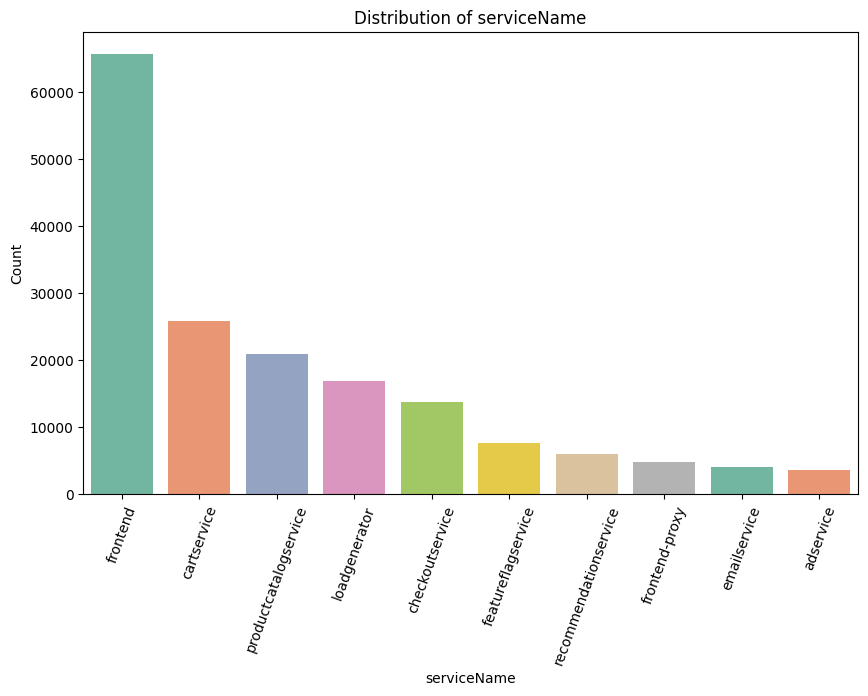

In [ ]:
plt.figure(figsize=(10,6))
## taking  count of unique values in serviceName using value_counts()

serviceName_counts = df['serviceName'].value_counts()
## selecting top 10 values

top_10_serviceName = serviceName_counts.head(10)

## selecting color patterns for our bars in barplot

color_palette = sns.color_palette("Set2")
## plotting barplot

sns.barplot(x=top_10_serviceName.index, y=top_10_serviceName.values,palette=color_palette)
plt.xlabel('serviceName')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.title('Distribution of serviceName')
plt.show()

**Insights:**

From the above barplot,we can see that most  frequently  invoked service is frontend service.Second position is for cartservice.Third position is for productcatalogservice.

In [8]:
df['Name'].value_counts()

HTTP GET                                          41311
oteldemo.ProductCatalogService/GetProduct         19453
grpc.oteldemo.ProductCatalogService/GetProduct    15741
HTTP POST                                         12938
HGET                                               8440
                                                  ...  
dns.lookup                                            3
tcp.connect                                           3
documentLoad                                          2
fs existsSync                                         2
documentFetch                                         2
Name: Name, Length: 66, dtype: int64

In [ ]:
df['Name'].nunique()

66

In [ ]:
df['Name'].unique()

array(['/', 'featureflagservice.repo.query:featureflags', 'ingress',
       'fs realpathSync', 'fs readFileSync', 'fs statSync', 'HTTP GET',
       'oteldemo.ProductCatalogService/GetProduct', 'HTTP POST',
       '/oteldemo.RecommendationService/ListRecommendations',
       'get_product_list', '/oteldemo.FeatureFlagService/GetFlag',
       '/oteldemo.ProductCatalogService/ListProducts',
       'oteldemo.CartService/AddItem',
       'oteldemo.ProductCatalogService/ListProducts', 'HGET', 'HMSET',
       'EXPIRE', 'grpc.oteldemo.CartService/GetCart',
       'oteldemo.CartService/GetCart',
       'grpc.oteldemo.ProductCatalogService/GetProduct',
       'oteldemo.FeatureFlagService/GetFlag',
       'grpc.oteldemo.CartService/AddItem',
       'grpc.oteldemo.CheckoutService/PlaceOrder', 'dns.lookup',
       'tcp.connect', 'oteldemo.CheckoutService/PlaceOrder',
       'prepareOrderItemsAndShippingQuoteFromCart',
       'oteldemo.CurrencyService/Convert', 'CurrencyService/Convert',
       'otel

**Distribution Of Name**

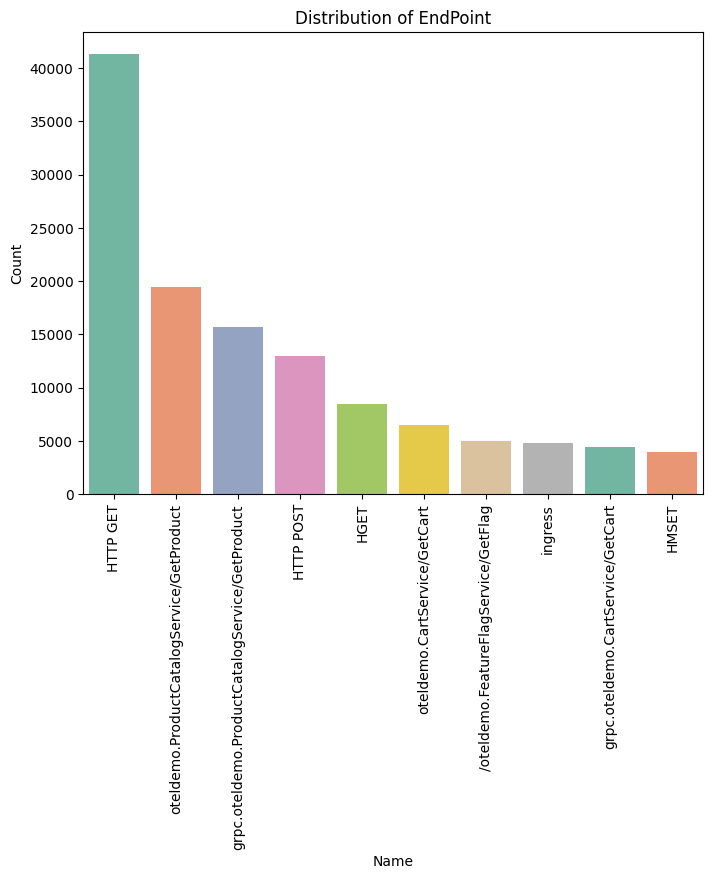

In [14]:
plt.figure(figsize=(8,6))
Name_counts = df['Name'].value_counts()
top_10_Name = Name_counts.head(10)
color_palette = sns.color_palette("Set2")
sns.barplot(x=top_10_Name.index, y=top_10_Name.values,palette=color_palette)
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Distribution of EndPoint')
plt.show()

Insights:

From above we can see that most frequency is for HTTP GET.

In [ ]:
slash_count = (df['Name'] == '/').sum()
# Print the count
print("Number of occurrences of '/':", slash_count)

Number of occurrences of '/': 289


Insights:

Find '/' value in  Name column, it represents a root or base operation or indicates the root endpoint of your service

In [ ]:
df['durationNano'].value_counts()

2816        124
4352        112
3072        112
4096        104
7936         97
           ... 
1572027       1
18893502      1
25780185      1
34851584      1
30845         1
Name: durationNano, Length: 126244, dtype: int64

In [ ]:
df['durationNano'].nunique()

126244

In [ ]:
df['durationNano'].unique()

array([ 887477,  481634,  213000, ..., 1016311,   34953,   30845])

**Distribution Of Duration**

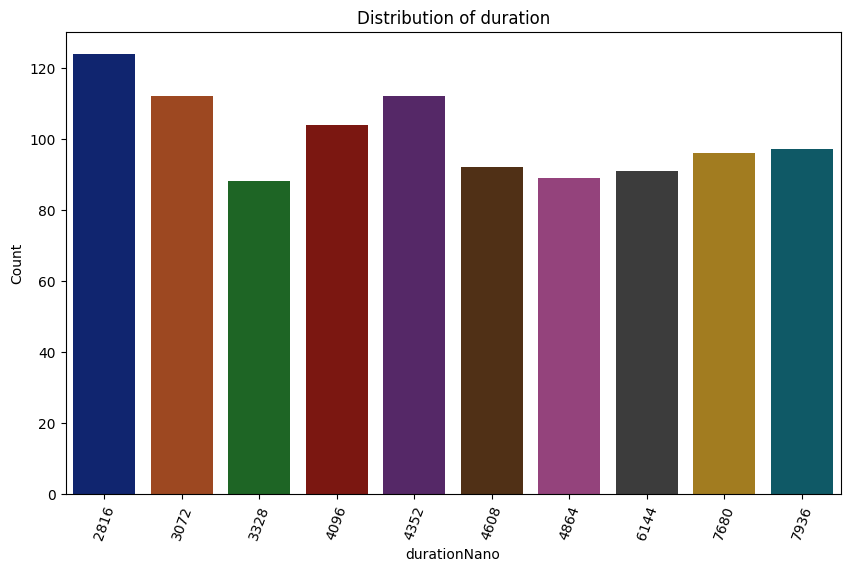

In [ ]:
## finding distribution of duration to find the span durations.
plt.figure(figsize=(10,6))
durationNano_counts = df['durationNano'].value_counts()
top_10_durationNano = durationNano_counts.head(10)
color_palette = sns.color_palette("dark")
sns.barplot(x=top_10_durationNano.index, y=top_10_durationNano.values,palette=color_palette)
plt.xlabel('durationNano')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.title('Distribution of duration')
plt.show()

**Insights**:

From above we can see that most of the span duration is about 2816 nanoseconds.


**Duration Analysis using Service and Name.**

In [85]:
## Duration Analysis using Service and Name to find the duration taken by the same service for different calls.
service_function_duration = df.groupby(['serviceName', 'Name'])['durationNano'].sum().reset_index()
service_function_duration_sorted=service_function_duration.sort_values(by='durationNano',ascending=False)
top_10=service_function_duration_sorted.head(10)
top_10

,serviceName,Name,durationNano
61,loadgenerator,HTTP GET,255238501897
36,frontend,HTTP GET,247261768704
37,frontend,HTTP POST,88721778432
62,loadgenerator,HTTP POST,56116945542
51,frontend,grpc.oteldemo.ProductCatalogService/GetProduct,43150328576
55,frontend-proxy,ingress,38005561000
53,frontend,grpc.oteldemo.RecommendationService/ListRecomm...,24394057216
49,frontend,grpc.oteldemo.CheckoutService/PlaceOrder,22834630912
15,checkoutservice,oteldemo.CheckoutService/PlaceOrder,21804552059
76,recommendationservice,/oteldemo.RecommendationService/ListRecommenda...,20214126037


**Insights:**

1)From above we can see  that most duration is taken by loadgenerator	for the call HTTP GET.

2)Secondly,frondend service for  HTTP GET took more duration than HTTP POST.


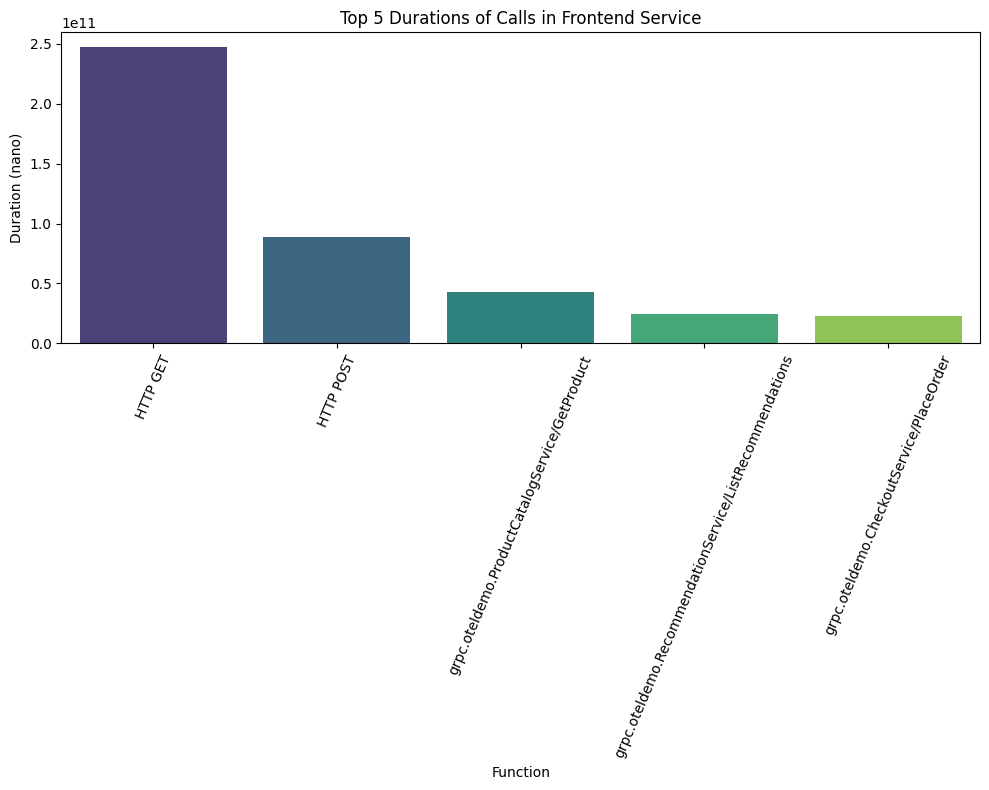

In [90]:
plt.figure(figsize=(10, 8))
## select service name whose diffrent duration calls needs to be find
frontend_data = service_function_duration[service_function_duration['serviceName'] == 'frontend']

# Sort the data by durationNano and select the top 5 rows
top_5_frontend = frontend_data.nlargest(5, 'durationNano')

# Plot the bar plot
sns.barplot(data=top_5_frontend, x="Name", y="durationNano", palette="viridis")
plt.title("Top 5 Durations of Calls in Frontend Service")
plt.xlabel("Function")
plt.ylabel("Duration (nano)")
plt.xticks(rotation=67)
plt.tight_layout()
plt.show()

Insights:

1)From the above barchart we get to know the different durations for frondend service calls.

2)Most duration is taken for HTTP GET.


**Top 5 frequently invoked service and endpoint combination.**

In [16]:
##Counting the frequency of each service and endpoint combination to identify which services and endpoints are most frequently invoked.

## Using group by function to  group our dataframe based on serviceName and Name ,it calculates the size of each group (i.e., the number of rows in each group)

service_endpoint_frequency = df.groupby(['serviceName', 'Name']).size().reset_index(name='Frequency')

## sorting based on frequency

service_endpoint_frequency_sorted=service_endpoint_frequency.sort_values(by='Frequency', ascending=False)

## selecting top 5 values

top_5=service_endpoint_frequency_sorted.head()
top_5

,serviceName,Name,Frequency
36,frontend,HTTP GET,28357
69,productcatalogservice,oteldemo.ProductCatalogService/GetProduct,17601
51,frontend,grpc.oteldemo.ProductCatalogService/GetProduct,15741
61,loadgenerator,HTTP GET,12874
6,cartservice,HGET,8440


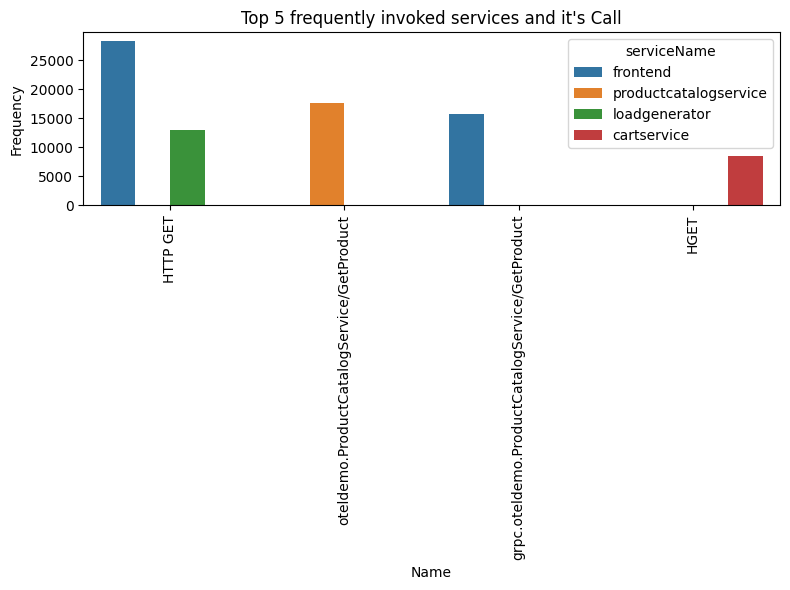

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_5,x="Name",hue="serviceName",y="Frequency")
plt.xticks(rotation=90)
plt.title("Top 5 frequently invoked services and it's Call")
plt.tight_layout()

**Insights:**

From above barchart we get know ,the most fequently invoked service is frondend service for HTTP GET.



**Finding Relationship between parentspanid and spanid**

In [92]:
##finding realtionship between parentspanid and spanid

# Check if parentSpanID matches any spanID
relationship = df[df['parentSpanID'].isin(df['spanID'])]

# Print the number of rows where parentSpanID matches a spanID
print("Number of rows where parentSpanID matches a spanID:", len(relationship))

Number of rows where parentSpanID matches a spanID: 141817


**Insights:**

1)There is a relationship between 'spanID' and 'parentSpanID', it indicates a hierarchical structure within the tracing data.
2)Specifically, it suggests that certain spans are acting as parents or containers for other spans,representing a nested or hierarchical relationship between different units of work within the system.

**Finding the number of spans for each trace**

In [103]:
## grouping dataframe based on unique traceid,then finding rows with unique spanid from it.
spans_per_trace = df.groupby('traceID')['spanID'].nunique()
spans_per_trace
spans_per_trace_df = pd.DataFrame(spans_per_trace)
spans_per_trace_df.columns = ['Number of Spans']

print(spans_per_trace_df)

                                  Number of Spans
traceID                                          
000053bc079dd69baf49f27402f929d1                2
0000cfc6e436569ead4e41d6c21dc146                2
00024f57bf021b67e2daccbb809f01ba                3
0002e6457f1c5989b146bd39de5f6236                2
0005d7a764e4468834d5eca0ae2459fc                1
...                                           ...
fff9810a25d705af4eec8850084ea401                1
fffc6901e600b43c712cc8d1fe61ecd2                4
fffcf3b8d639393b07e7da5ca0119ae3                3
fffda69149e37441ef69c81b9127109c                2
fffedf2a701f415b35017375291498d8                3

[41792 rows x 1 columns]


**Insights:**

From the above we can see that a trace may contain multiple spans, it signifies that a single operation or request traverses through multiple services or components in your system.


**Finding which all services belongs to a particular trace**

In [105]:
# Group by traceID and aggregate the serviceName values
services_per_trace = df.groupby('traceID')['serviceName'].unique()

# Convert the result to a DataFrame
services_per_trace_df = pd.DataFrame(services_per_trace)
services_per_trace_df.reset_index(inplace=True)

# Print the DataFrame
print(services_per_trace_df)

                                traceID                        serviceName
0      000053bc079dd69baf49f27402f929d1          [loadgenerator, frontend]
1      0000cfc6e436569ead4e41d6c21dc146          [loadgenerator, frontend]
2      00024f57bf021b67e2daccbb809f01ba  [frontend, productcatalogservice]
3      0002e6457f1c5989b146bd39de5f6236          [loadgenerator, frontend]
4      0005d7a764e4468834d5eca0ae2459fc                   [paymentservice]
...                                 ...                                ...
41787  fff9810a25d705af4eec8850084ea401                   [frontend-proxy]
41788  fffc6901e600b43c712cc8d1fe61ecd2              [frontend, adservice]
41789  fffcf3b8d639393b07e7da5ca0119ae3  [frontend, productcatalogservice]
41790  fffda69149e37441ef69c81b9127109c          [loadgenerator, frontend]
41791  fffedf2a701f415b35017375291498d8  [frontend, productcatalogservice]

[41792 rows x 2 columns]


**Insights:**

From above we get to know which all services invoked during a single request.

**CONCLUSIONS:**


1)From the EDA we get to know that in our given dataset a trace  contain multiple spans, it signifies that a single operation or request traverses through multiple services or components in your system.

2)There is a relationship between 'spanID' and 'parentSpanID', it indicates a hierarchical structure within the tracing data.

3)Specifically, it suggests that certain spans are acting as parents or containers for other spans,representing a nested or hierarchical relationship between different units of work within the system.

4)The most frequently invoked service is frondend service for HTTP GET.

5)Most of the span duration is about 2816 nanoseconds.